<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scalable-Swiss-Clock" data-toc-modified-id="Scalable-Swiss-Clock-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scalable Swiss Clock</a></span></li><li><span><a href="#Earlier-versions" data-toc-modified-id="Earlier-versions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Earlier versions</a></span></li><li><span><a href="#Trials-to-use-rectangles-for-clock-face-plate" data-toc-modified-id="Trials-to-use-rectangles-for-clock-face-plate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trials to use rectangles for clock face plate</a></span></li></ul></div>

## Scalable Swiss Clock

The hour hand moves at the rate of 0.5 degrees per minute
The minute and second hands moves at the rate of of 6 degrees per minute


In [1]:
#Function to calculate the coordinates when a clock hand rotates
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [2]:
import datetime
now = datetime.datetime.now()
# print('Minute', now.minute)
# print('Hour', now.hour)
# print('second', now.second)

In [3]:
#Calculate the angle of the hand from 12 'o clock'
minute_hand = now.minute * 6
#Calculate the angle of the hand on the other side of the centre point
minute_hand_opposite = (now.minute+30) * 6

In [4]:
#convert 24 hour to 12 hour
import time
t = time.strptime(str(now.hour), "%H")
timevalue_12hour = time.strftime( "%I", t )

hour_hand = (int(timevalue_12hour)*60+now.minute)*.5

hour_hand_opposite = ((int(timevalue_12hour)*60+now.minute)+360)*.5

In [5]:
seconds_hand = now.second * 6

seconds_hand_opposite = (now.second+30) * 6

In [6]:
# Define midpoint
origin = (0, 0)

#define length of hand by defining point at 12 'o clock'
pointhour = (.75, 0)
pointminute = (.95, 0)
pointsecond = (.80, 0)

pointopposite = (.2,0)
pointoppositesec = (.3,0)


facehourmarkstart = (.85,0)
faceminutemarkstart = (.92,0)
facemarkend = (1,0)


In [7]:
# Calculate points for hands
xm, ym = rotate(origin, pointminute, math.radians(minute_hand))

xmo, ymo = rotate(origin, pointopposite, math.radians(minute_hand_opposite))

xh, yh = rotate(origin, pointhour, math.radians(hour_hand))

xho, yho = rotate(origin, pointopposite, math.radians(hour_hand_opposite))

xs, ys = rotate(origin, pointsecond, math.radians(seconds_hand))

xso, yso = rotate(origin, pointoppositesec, math.radians(seconds_hand_opposite))

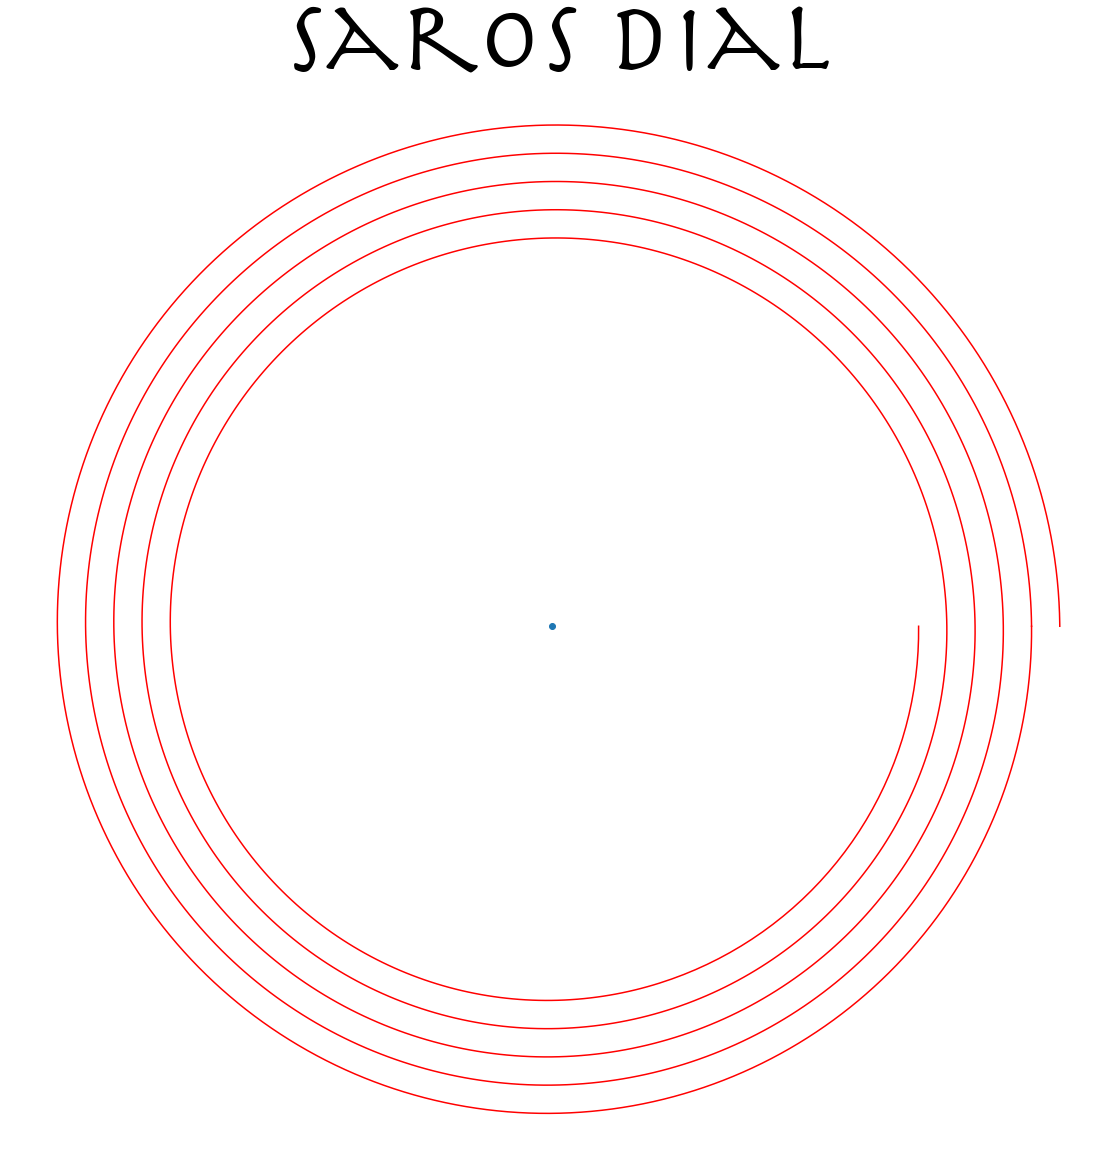

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = 26*np.pi, 34*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 4*364+1 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

x = r*np.cos(theta)
y = r*np.sin(-theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rComp = thetaComp * a

xComp = rComp*np.cos(thetaComp)
yComp = rComp*np.sin(-thetaComp)

# Seperator lines 
# Need to plot between the period startpoint accros the turn(out from the center (0,0))
l=np.sqrt(np.square(x)+np.square(y)+1.5) # calculate length from center, just shortening it makes it not overshoot
xnew= x*1/l*(l+2*np.pi*a) # get the x  for the line extendeaccros the turn
ynew= y*1/l*(l+2*np.pi*a) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
plt.axis('off')

for i in range(len(x),5):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r')
#     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference



plt.plot(x, y, c='r')
plt.plot(xComp, yComp,c='r')
plt.scatter(0,0)

plt.title('Saros Dial', {'fontname': 'Herculanum',
                         'fontsize': '100',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})
# plt.savefig("spiral.png")
plt.show();

In [76]:
(365*4)+1

1461

In [3]:
temp=[31,59,90,120,151,181,212,243,273,304,334,365,396,424,455,485,516,546,577,608,638,669,699,730,761,789,820,850,881,911,942,973,1003,1034,1064,1095,1126,1155,1186,1216,1247,1277,1308,1339,1369,1400,1430]

In [4]:
monthstart = [x+1 for x in temp]
monthstart.insert(0,0)
monthstart

[0,
 32,
 60,
 91,
 121,
 152,
 182,
 213,
 244,
 274,
 305,
 335,
 366,
 397,
 425,
 456,
 486,
 517,
 547,
 578,
 609,
 639,
 670,
 700,
 731,
 762,
 790,
 821,
 851,
 882,
 912,
 943,
 974,
 1004,
 1035,
 1065,
 1096,
 1127,
 1156,
 1187,
 1217,
 1248,
 1278,
 1309,
 1340,
 1370,
 1401,
 1431]

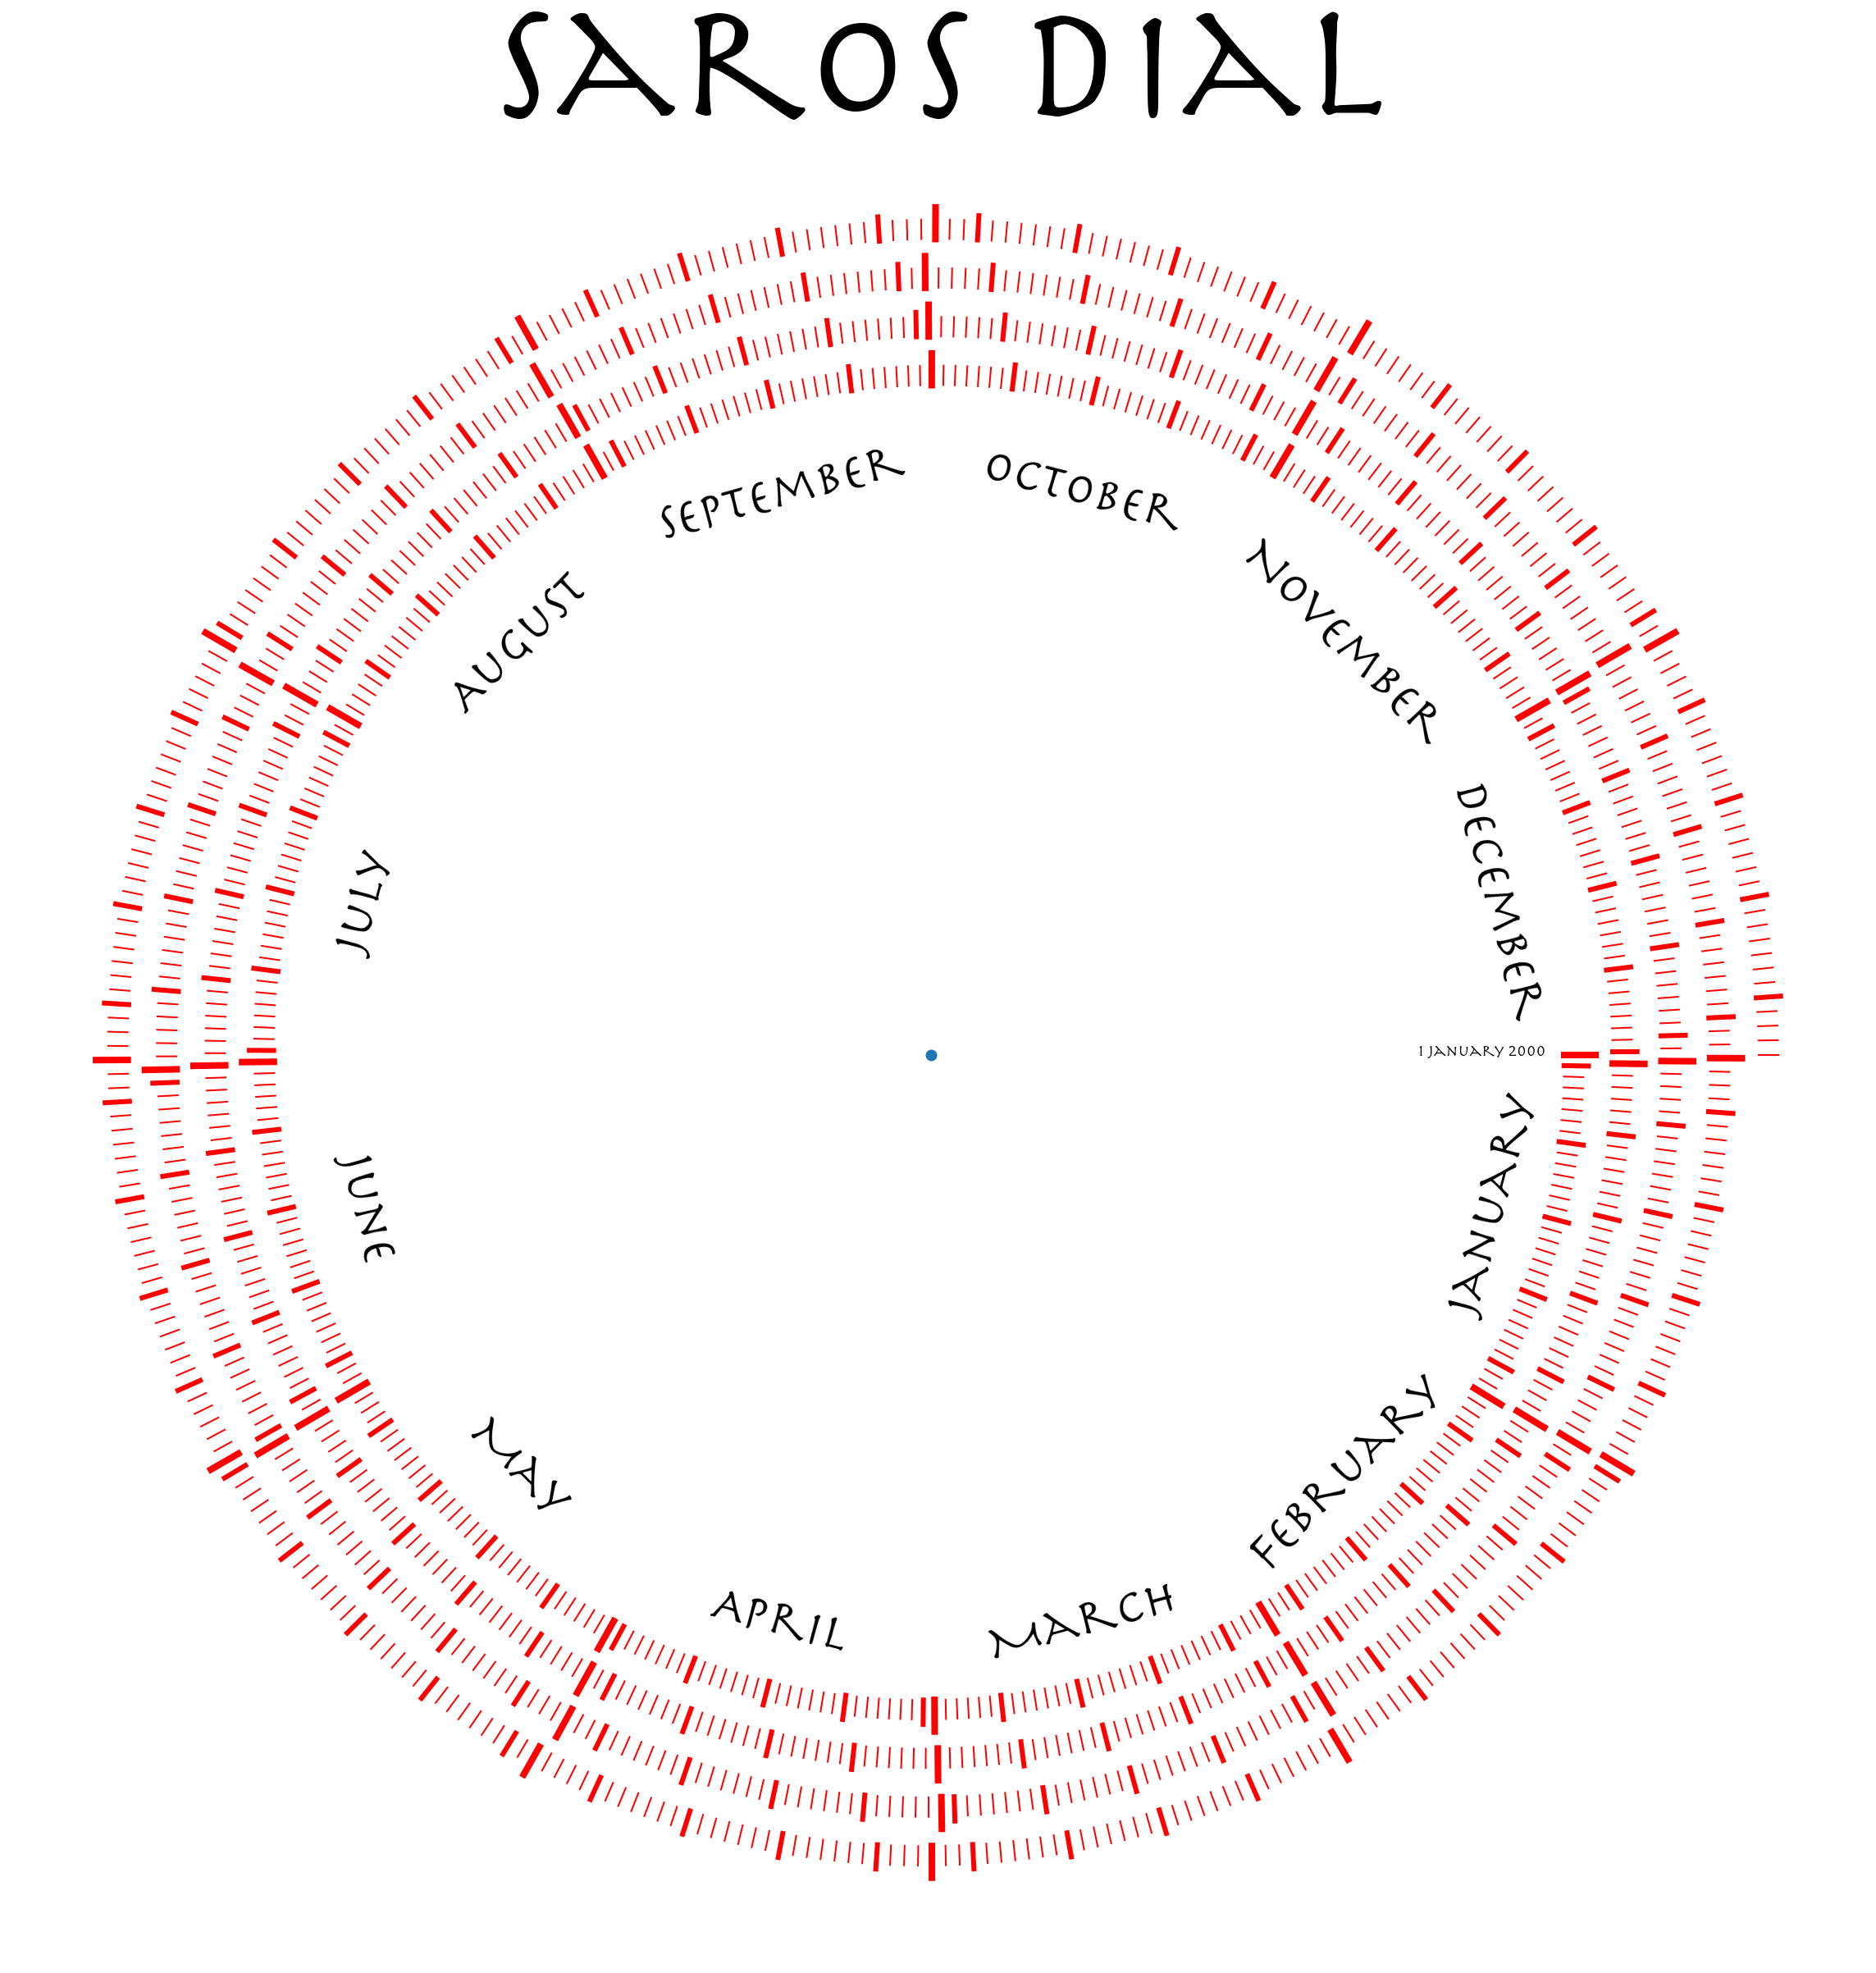

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = 26*np.pi, 34*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 365*4+1+1 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

x = r*np.cos(theta)
y = r*np.sin(-theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rComp = thetaComp * a

xComp = rComp*np.cos(thetaComp)
yComp = rComp*np.sin(-thetaComp)

# Seperator lines 
# Need to plot between the period startpoint accros the turn(out from the center (0,0))
l=np.sqrt(np.square(x)+np.square(y)) # calculate length from center, just shortening it makes it not overshoot
xnew= x*1/l*(l+2*np.pi*0.8) # get the x  for the line extendeaccros the turn
ynew= y*1/l*(l+2*np.pi*0.8) # get the y  for the line extendeaccros the turn

x2new= x*1/l*(l+2*np.pi*1.0) # get the x  for the line extendeaccros the turn
y2new= y*1/l*(l+2*np.pi*1.0) # get the y  for the line extendeaccros the turn

x3new= x*1/l*(l+2*np.pi*1.3) # get the x  for the line extendeaccros the turn
y3new= y*1/l*(l+2*np.pi*1.3) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(20*1.03,20*1.03))
ax.set_aspect('equal')
plt.axis('off')

for i in range(0,len(x)):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r', lw=1)
#     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference
# plt.plot(x, y, c='w', lw=8)
# plt.plot(xComp, yComp,c='w',lw=8)
for i in range(1,len(x),7):
    plt.plot([x[i],x2new[i]],[y[i],y2new[i]], c='r', lw=3)
    
for i in monthstart:
    plt.plot([x[i],x3new[i]],[y[i],y3new[i]], c='r', lw=4)


# plt.plot(x, y, c='w', lw=6)
# plt.plot(xComp, yComp,c='w',lw=6)
plt.scatter(0,0)

plt.title('Saros Dial', {'fontname': 'Herculanum',
                         'fontsize': '100',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})

a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = np.pi/12, 2*np.pi+np.pi/12# Dial starts at the 13th turn and finishes at the 17th turn
steps = 13 # Number of Saros periods (+1 for end marker)


# Generate plotting values

theta = np.linspace(thetaMin, thetaMax, steps)

r = 48*np.pi

x = r*np.cos(-theta)
y = r*np.sin(-theta)
months=['January','February', 'March', 'April','May', 'June', 
        'July', 'August', 'September', 'October','November', 'December']
# plt.figure(figsize=(4,4))
# plt.scatter(x,y);
# plt.scatter(x[0],y[0]);
# plt.scatter(x[1],y[1]);

# plt.figure(figsize=(6,6))
# plt.scatter(x,y)

for label, x, y, angle in zip(months, x, y, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = angle, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'bold'})
plt.text(40*np.pi,0,'1 January 2000',fontdict={'fontname': 'Herculanum',
                         'fontsize': '10'} )

plt.savefig("spiral.png")
plt.show()

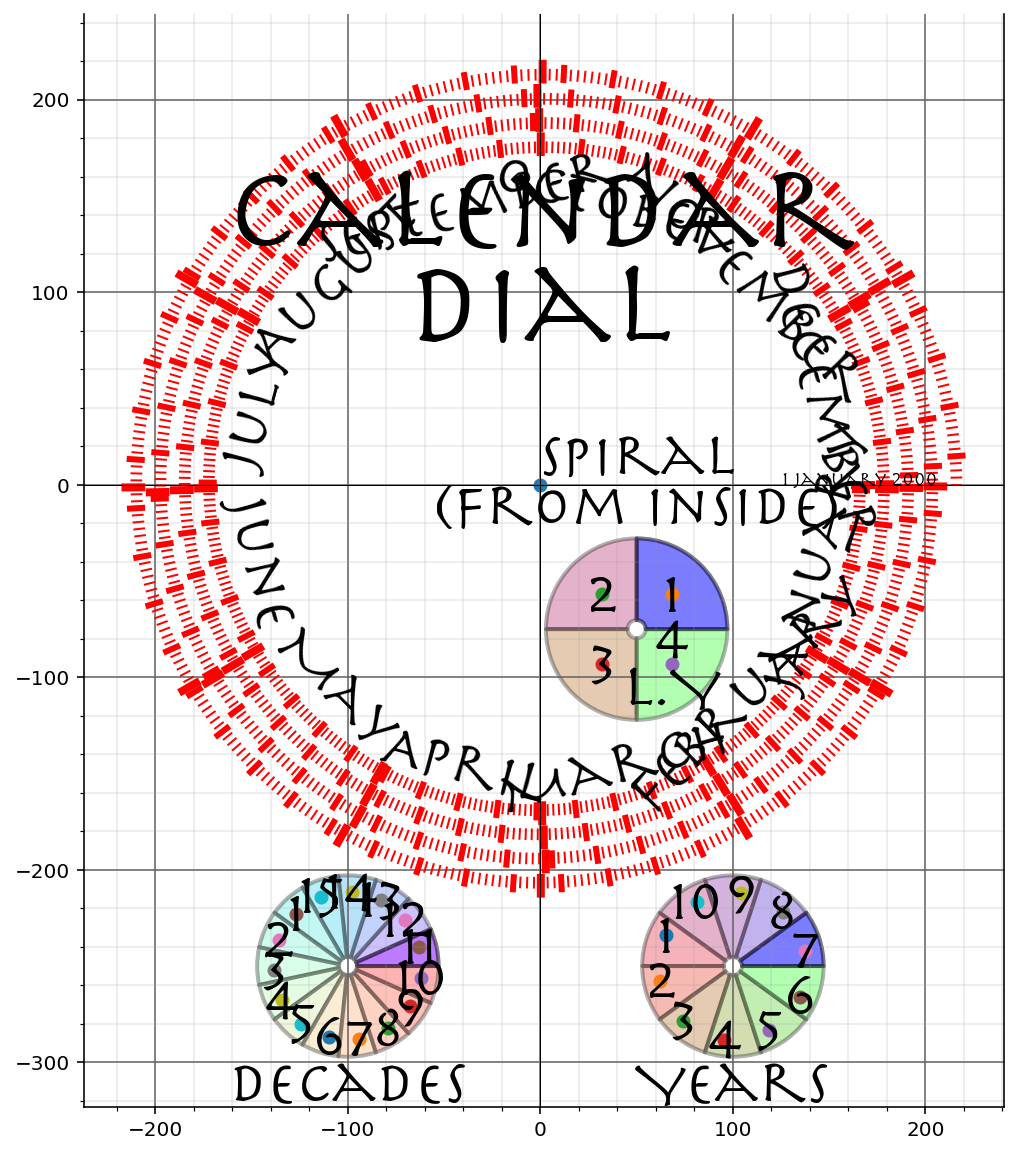

In [18]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = 26*np.pi, 34*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 365*4+1+1 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

x = r*np.cos(theta)
y = r*np.sin(-theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rComp = thetaComp * a

xComp = rComp*np.cos(thetaComp)
yComp = rComp*np.sin(-thetaComp)

# Seperator lines 
# Need to plot between the period startpoint accros the turn(out from the center (0,0))
l=np.sqrt(np.square(x)+np.square(y)) # calculate length from center, just shortening it makes it not overshoot
xnew= x*1/l*(l+2*np.pi*0.8) # get the x  for the line extendeaccros the turn
ynew= y*1/l*(l+2*np.pi*0.8) # get the y  for the line extendeaccros the turn

x2new= x*1/l*(l+2*np.pi*1.0) # get the x  for the line extendeaccros the turn
y2new= y*1/l*(l+2*np.pi*1.0) # get the y  for the line extendeaccros the turn

x3new= x*1/l*(l+2*np.pi*1.3) # get the x  for the line extendeaccros the turn
y3new= y*1/l*(l+2*np.pi*1.3) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(8.25,11.75))#A4
ax.set_aspect('equal')
# plt.axis('off')

for i in range(0,len(x)):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r', lw=1)
#     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference
# plt.plot(x, y, c='w', lw=8)
# plt.plot(xComp, yComp,c='w',lw=8)
for i in range(1,len(x),7):
    plt.plot([x[i],x2new[i]],[y[i],y2new[i]], c='r', lw=3)
    
for i in monthstart:
    plt.plot([x[i],x3new[i]],[y[i],y3new[i]], c='r', lw=4)


# plt.plot(x, y, c='w', lw=6)
# plt.plot(xComp, yComp,c='w',lw=6)
plt.scatter(0,0)

plt.text(0,75,'Calendar\nDial', {'fontname': 'Herculanum',
                         'fontsize': '60',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})

a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = np.pi/12, 2*np.pi+np.pi/12# Dial starts at the 13th turn and finishes at the 17th turn
steps = 13 # Number of Saros periods (+1 for end marker)


# Generate plotting values

theta = np.linspace(thetaMin, thetaMax, steps)

r = 48*np.pi

x = r*np.cos(-theta)
y = r*np.sin(-theta)
months=['January','February', 'March', 'April','May', 'June', 
        'July', 'August', 'September', 'October','November', 'December']
# plt.figure(figsize=(4,4))
# plt.scatter(x,y);
# plt.scatter(x[0],y[0]);
# plt.scatter(x[1],y[1]);

# plt.figure(figsize=(6,6))
# plt.scatter(x,y)

for label, x, y, angle in zip(months, x, y, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = angle, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'bold'})
plt.text(40*np.pi,0,'1 January 2000',fontdict={'fontname': 'Herculanum',
                         'fontsize': '10'} )


#####

patches=[]
ws=[]
we=[]
n = 4
radius = 15*np.pi
for i in np.arange(0,n+1):
    ws.append(360/n*i),
    we.append(360/n*(i+1))
for x in zip(ws,we):
    wedge = Wedge((50,-75), radius, x[0], x[1],width=0.90*15*np.pi)
    patches.append(wedge)




colors = np.linspace(0, 1, len(patches[:-1]))
collection = PatchCollection(patches, cmap='brg', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)


a = (4.1/17.1)*34*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
# thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = n+1 # Number of Saros periods (+1 for end marker)
# 
# if n//2==0: 
thetaMin, thetaMax = (0+(2*np.pi/n/2)), (2*np.pi+(2*np.pi/n/2))
# if n//2 !=0:
#     thetaMin, thetaMax = 0, 2*np.pi
#     thetaMin, thetaMax = ((0.5*np.pi)+((2*np.pi)/(.5*steps))), ((2.5*np.pi)+((2*np.pi)/(.5*steps)))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = a*1

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
labels=['1','2','3','4\nL.Y']
# labels=[]
# for i in range(n):
#     labels.append(str(i+1)[::-1])
for label, x, y, angle in zip(labels, xOuter+50, yOuter-75, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'black'})
        plt.scatter(x,y)
plt.text(50,-20,'Spiral\n(from inside)', {'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'heavy',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})

######
patches=[]
ws=[]
we=[]
n = 15
radius = 15*np.pi
for i in np.arange(0,n+1):
    ws.append(360/n*i),
    we.append(360/n*(i+1))
for x in zip(ws,we):
    wedge = Wedge((-100,-250), radius, x[0], x[1],width=0.90*15*np.pi)
    patches.append(wedge)




colors = np.linspace(0, 1, len(patches[:-1]))
collection = PatchCollection(patches, cmap='rainbow', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)


a = (4.1/17.1)*34*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
# thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = n+1 # Number of Saros periods (+1 for end marker)
# 
if n//2==0: 
    thetaMin, thetaMax = (0+(2*np.pi/n/2)), (2*np.pi+(2*np.pi/n/2))
if n//2 !=0:
#     thetaMin, thetaMax = 0, 2*np.pi
    thetaMin, thetaMax = ((0.5*np.pi)+((2*np.pi)/(.5*steps))), ((2.5*np.pi)+((2*np.pi)/(.5*steps)))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = a*1.5

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
# labels=['1','2','3','4\nL.Y']
labels=[]
for i in range(n):
    labels.append(str(i+1))
for label, x, y, angle in zip(labels, xOuter-100, yOuter-250, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'black'})
        plt.scatter(x,y)
plt.text(-100,-320,'Decades', {'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'heavy',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})


######
patches=[]
ws=[]
we=[]
n = 10
radius = 15*np.pi
for i in np.arange(0,n+1):
    ws.append(360/n*i),
    we.append(360/n*(i+1))
for x in zip(ws,we):
    wedge = Wedge((+100,-250), radius, x[0], x[1],width=0.90*15*np.pi)
    patches.append(wedge)




colors = np.linspace(0, 1, len(patches[:-1]))
collection = PatchCollection(patches, cmap='brg', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)


a = (4.1/17.1)*34*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
# thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = n+1 # Number of Saros periods (+1 for end marker)
# 
if n//2==0: 
    thetaMin, thetaMax = (0+(2*np.pi/n/2)), (2*np.pi+(2*np.pi/n/2))
if n//2 !=0:
#     thetaMin, thetaMax = 0, 2*np.pi
    thetaMin, thetaMax = ((0.5*np.pi)+((2*np.pi)/(.5*steps))), ((2.5*np.pi)+((2*np.pi)/(.5*steps)))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = a*1.5

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
# labels=['1','2','3','4\nL.Y']
labels=[]
for i in range(n):
    labels.append(str(i+1))
for label, x, y, angle in zip(labels, xOuter+100, yOuter-250, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'black'})
        plt.scatter(x,y)
plt.text(+100,-320,'Years', {'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'heavy',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})




ax.spines['top'].set_color('none')

ax.axhline(color='black', lw=0.5)
ax.axvline(color='black', lw=0.5)

# ax.spines['left'].set_position(('data', 0.0))
# ax.spines['bottom'].set_position(('data', 0.0))
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
ax.set_aspect('equal')


# Show the major grid lines with dark grey lines
ax.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
ax.minorticks_on()
ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


# ax.axis('off')
# ax.plot()   #Causes an autoscale update.
# plt.tight_layout()
# plt.show()
plt.savefig('temp1.png', dpi=None, facecolor=None, edgecolor='black',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0
        , metadata=None)
!open 'temp1.png'

# set_size(fig, (10, 10))
# plt.savefig("update-size.png", bbox_inches='tight')
# print(imread("update-size.png").shape)
# plt.savefig("spiral.png")
# plt.show()

In [500]:
from matplotlib.image import imread
from tempfile import NamedTemporaryFile

def get_size(fig, dpi=100):
    with NamedTemporaryFile(suffix='.png') as f:
        fig.savefig(f.name, bbox_inches='tight', dpi=dpi)
        height, width, _channels = imread(f.name).shape
        return width / dpi, height / dpi

def set_size(fig, size, dpi=100, eps=1e-2, give_up=2, min_size_px=10):
    target_width, target_height = size
    set_width, set_height = target_width, target_height # reasonable starting point
    deltas = [] # how far we have
    while True:
        fig.set_size_inches([set_width, set_height])
        actual_width, actual_height = get_size(fig, dpi=dpi)
        set_width *= target_width / actual_width
        set_height *= target_height / actual_height
        deltas.append(abs(actual_width - target_width) + abs(actual_height - target_height))
        if deltas[-1] < eps:
            return True
        if len(deltas) > give_up and sorted(deltas[-give_up:]) == deltas[-give_up:]:
            return False
        if set_width * dpi < min_size_px or set_height * dpi < min_size_px:
            return False

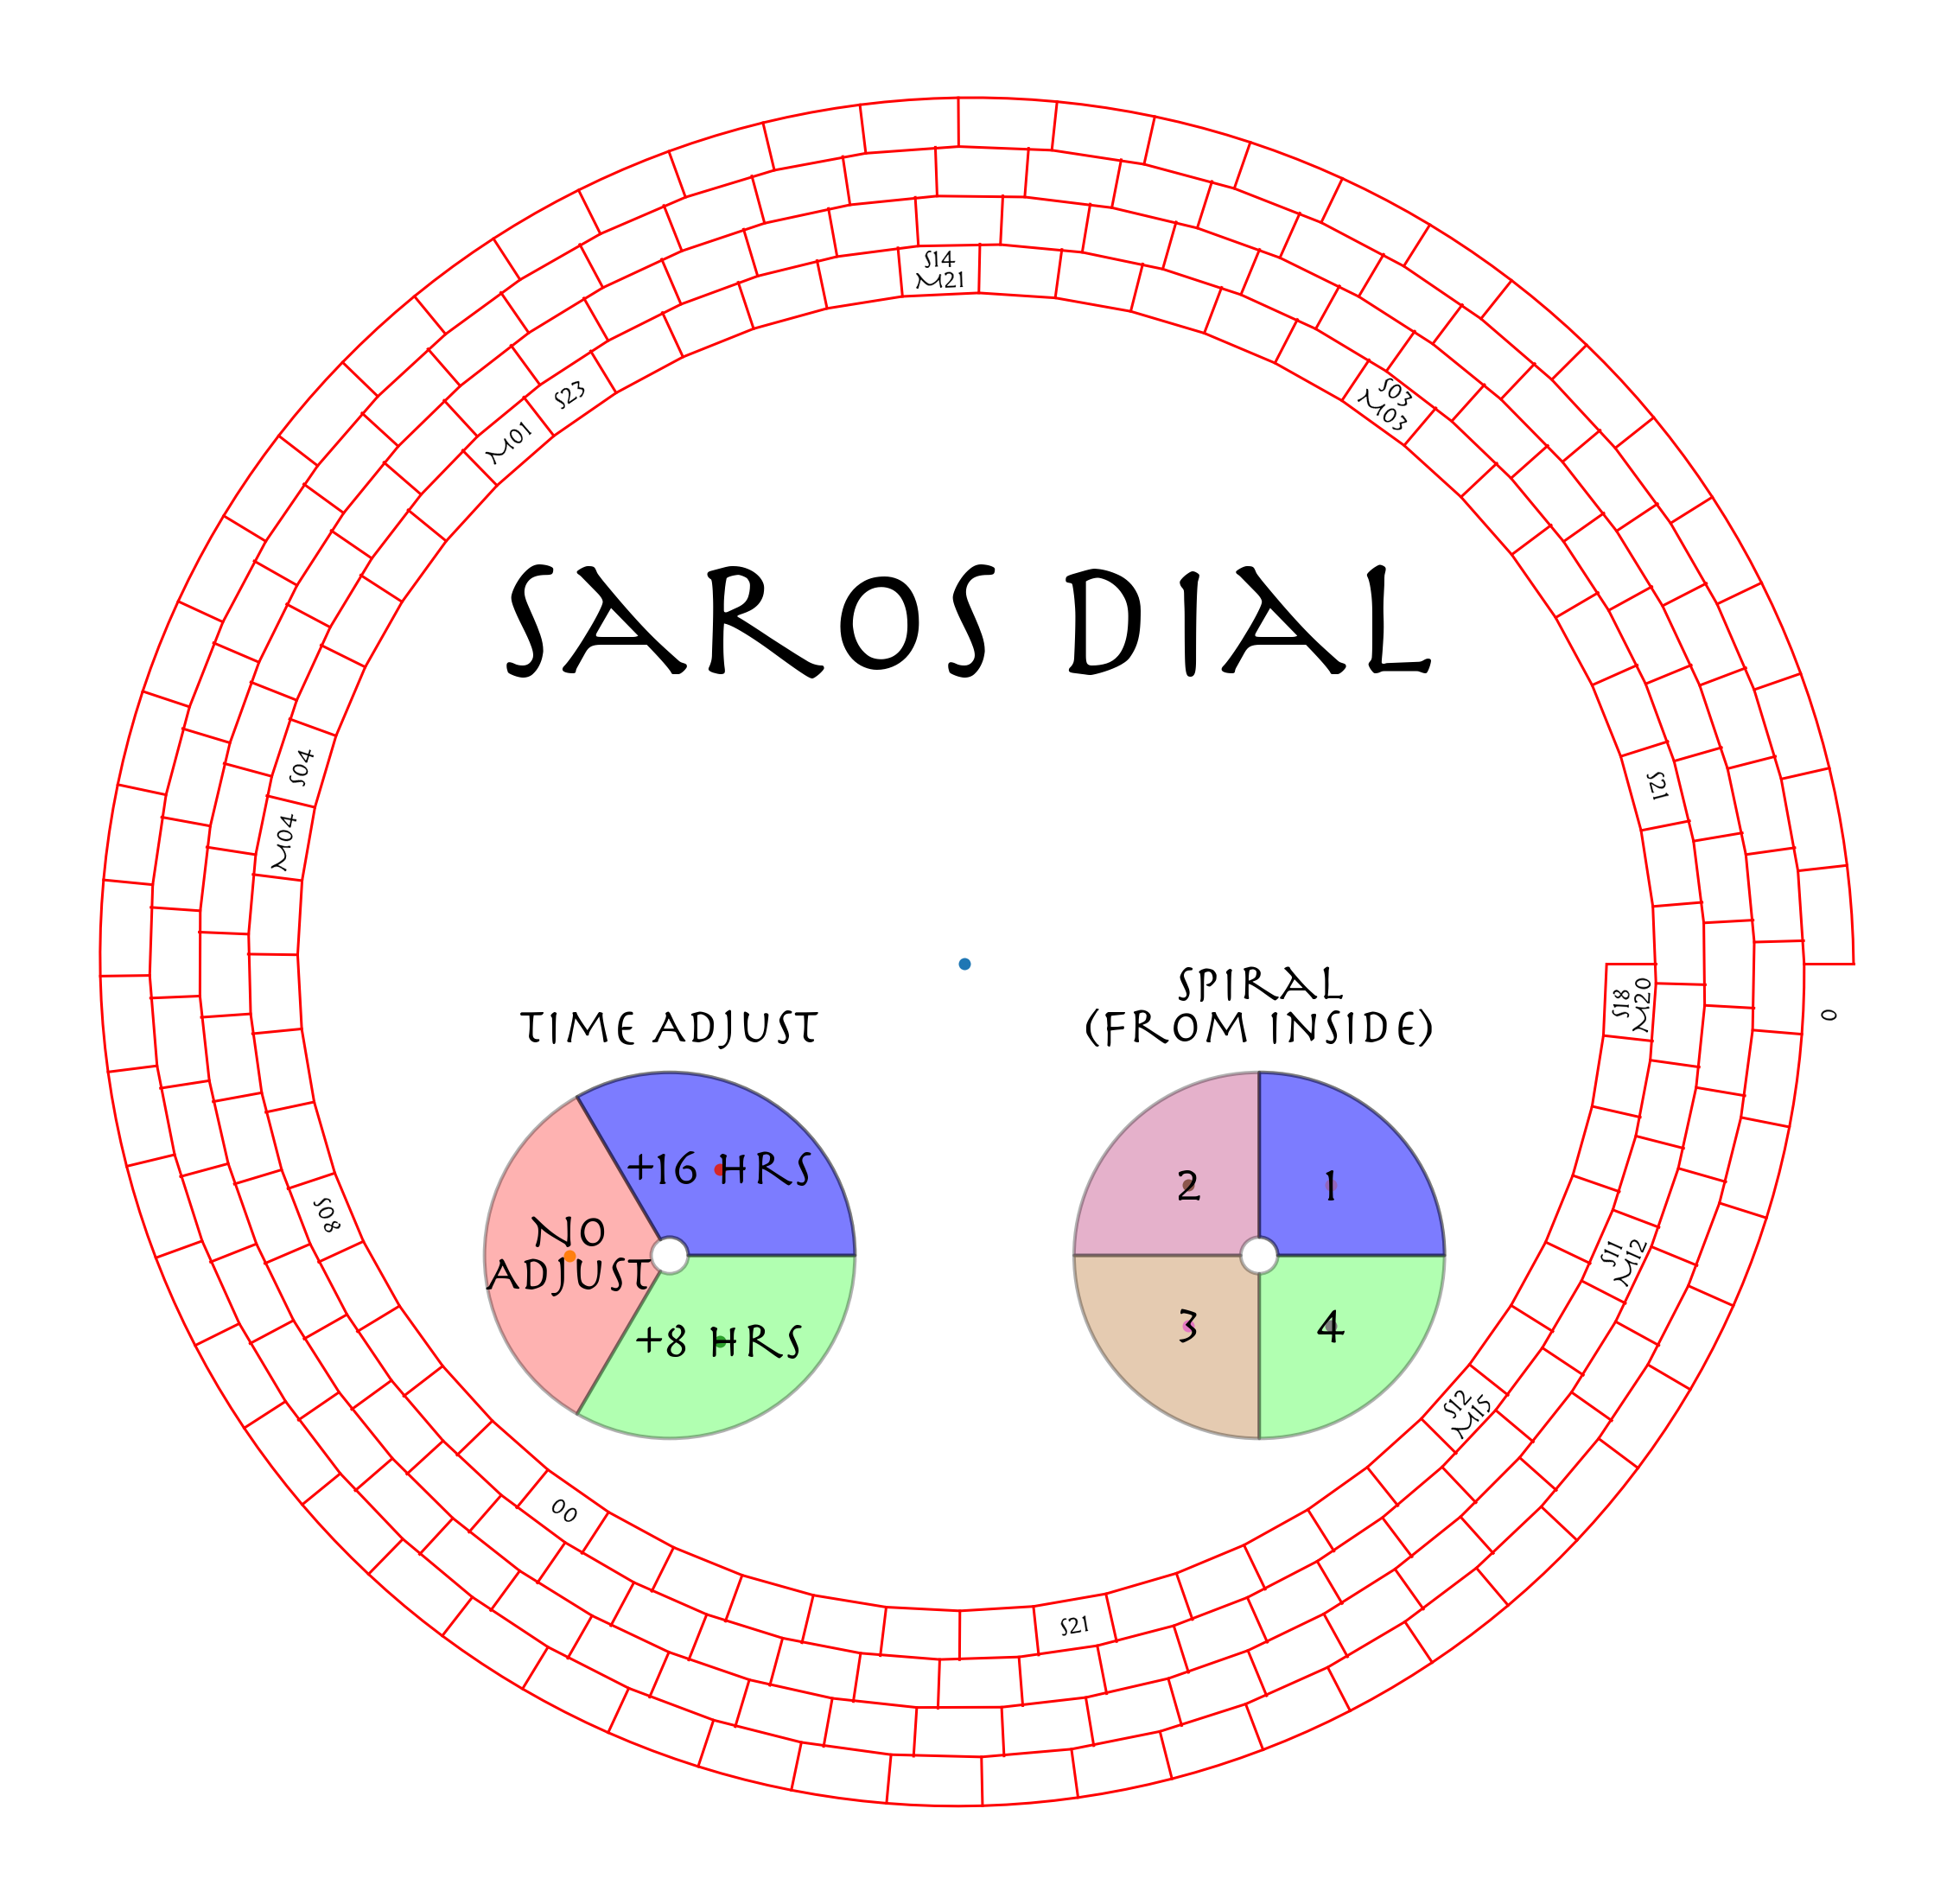

In [599]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = 26*np.pi, 34*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 223+1 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

x = r*np.cos(theta)
y = r*np.sin(-theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rComp = thetaComp * a

xComp = rComp*np.cos(thetaComp)
yComp = rComp*np.sin(-thetaComp)

# Seperator lines 
# Need to plot between the period startpoint accros the turn(out from the center (0,0))
l=np.sqrt(np.square(x)+np.square(y)+1.5) # calculate length from center, just shortening it makes it not overshoot
xnew= x*1/l*(l+2*np.pi*a) # get the x  for the line extendeaccros the turn
ynew= y*1/l*(l+2*np.pi*a) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(20,20))
# ax.set_aspect('equal')
plt.axis('off')

for i in range(len(x)):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r')
#     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference

steps = 223+1 # Number of Saros periods (+1 for end marker)
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = (26*np.pi+(2*np.pi)/(.5*steps)), (34*np.pi+(2*np.pi)/(.5*steps)) # Dial starts at the 13th turn and finishes at the 17th turn


theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

xx = r*np.cos(theta)
yy = r*np.sin(-theta)
xxnew= xx*1/l*(l+2*np.pi*(a*.5)) # get the x  for the line extendeaccros the turn
yynew= yy*1/l*(l+2*np.pi*(a*.5)) # get the y  for the line extendeaccros the turn
plt.plot(x, y, c='r')
plt.plot(xComp, yComp,c='r')
# plt.scatter(x,y)
# plt.scatter(xxnew,yynew)

for label, x, y, angle in zip(sl, xxnew, yynew, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = angle, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '15',
        'fontweight' : 'bold'})

plt.scatter(0,0)

plt.text(0,75,'Saros Dial', {'fontname': 'Herculanum',
                         'fontsize': '100',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})

######

patches=[]
ws=[]
we=[]
n = 3
radius = 15*np.pi
for i in np.arange(0,n+1):
    ws.append(360/n*i),
    we.append(360/n*(i+1))
for x in zip(ws,we):
    wedge = Wedge((-75,-75), radius, x[0], x[1],width=0.90*15*np.pi)
    patches.append(wedge)




colors = np.linspace(0, 1, len(patches[:-1]))
collection = PatchCollection(patches, cmap='brg', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)


a = (4.1/17.1)*34*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
# thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = n+1 # Number of Saros periods (+1 for end marker)
# 
if n//2==0: 
    thetaMin, thetaMax = (0+(2*np.pi/n/2)), (2*np.pi+(2*np.pi/n/2))
if n//2 !=0:
    thetaMin, thetaMax = 0, 2*np.pi
#     thetaMin, thetaMax = ((0.5*np.pi)+((2*np.pi)/(.5*steps))), ((2.5*np.pi)+((2*np.pi)/(.5*steps)))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = -a*1

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
labels=['No\nAdjust', '+8 hrs', '+16 hrs']
# for i in range(n):
#     labels.append(str(i))
for label, x, y, angle in zip(labels, xOuter-75, yOuter-75, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'black'})
        plt.scatter(x,y)
        
plt.text(-75,-20,'Time Adjust', {'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'heavy',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})


######

patches=[]
ws=[]
we=[]
n = 4
radius = 15*np.pi
for i in np.arange(0,n+1):
    ws.append(360/n*i),
    we.append(360/n*(i+1))
for x in zip(ws,we):
    wedge = Wedge((75,-75), radius, x[0], x[1],width=0.90*15*np.pi)
    patches.append(wedge)




colors = np.linspace(0, 1, len(patches[:-1]))
collection = PatchCollection(patches, cmap='brg', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)


a = (4.1/17.1)*34*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
# thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = n+1 # Number of Saros periods (+1 for end marker)
# 
# if n//2==0: 
thetaMin, thetaMax = (0+(2*np.pi/n/2)), (2*np.pi+(2*np.pi/n/2))
# if n//2 !=0:
#     thetaMin, thetaMax = 0, 2*np.pi
#     thetaMin, thetaMax = ((0.5*np.pi)+((2*np.pi)/(.5*steps))), ((2.5*np.pi)+((2*np.pi)/(.5*steps)))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = a*1

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
# labels=['No\nAdjust', '+8 hrs', '+16 hrs']
labels=[]
for i in range(n):
    labels.append(str(i+1)[::-1])
for label, x, y, angle in zip(labels, xOuter+75, yOuter-75, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'black'})
        plt.scatter(x,y)
plt.text(75,-20,'Spiral\n(from inside)', {'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'heavy',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})





# plt.savefig("spiral.png")
plt.show()

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

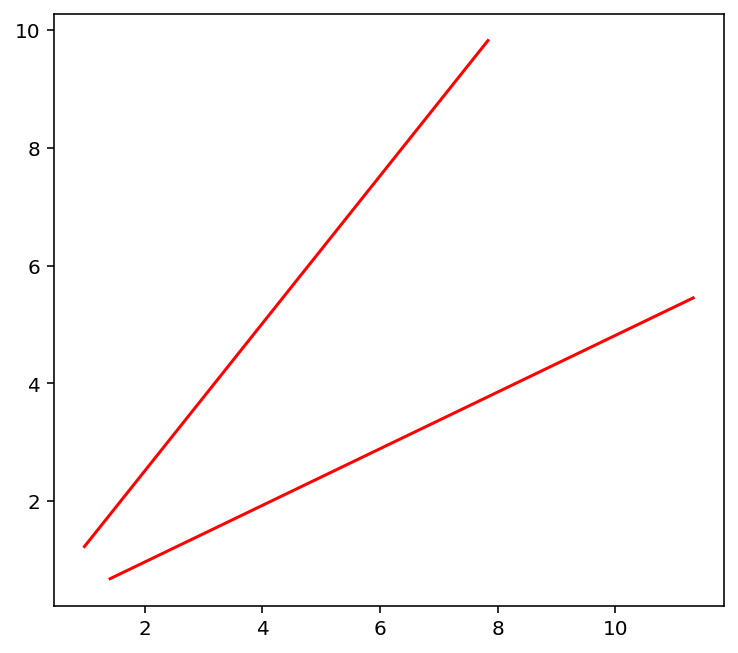

In [285]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 4*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 14+1 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = a

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rInner = b

xInner = rInner*np.cos(theta)
yInner = rInner*np.sin(theta)

# # Seperator lines 
# # Need to plot between the period startpoint accros the turn(out from the center (0,0))
# l=np.sqrt(np.square(x)+np.square(y)+1.5) # calculate length from center, just shortening it makes it not overshoot
# xnew= x*1/l*(l+2*np.pi*a) # get the x  for the line extendeaccros the turn
# ynew= y*1/l*(l+2*np.pi*a) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
# plt.axis('off')

# for i in range(len(x)):
#     plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r')
# #     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference

# steps = 223+1 # Number of Saros periods (+1 for end marker)
# a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
# thetaMin, thetaMax = (26*np.pi+(2*np.pi)/(.5*steps)), (34*np.pi+(2*np.pi)/(.5*steps)) # Dial starts at the 13th turn and finishes at the 17th turn


# theta = np.linspace(thetaMin, thetaMax, steps)

# r = theta * a

# xx = r*np.cos(theta)
# yy = r*np.sin(-theta)
# xxnew= xx*1/l*(l+2*np.pi*(a*.5)) # get the x  for the line extendeaccros the turn
# yynew= yy*1/l*(l+2*np.pi*(a*.5)) # get the y  for the line extendeaccros the turn
# plt.plot(x, y, c='r')
# plt.plot(xComp, yComp,c='r')

# for i in range(len(xInner)):
#     plt.plot([xInner[i],xOuter[i]],[yInner[i],yOuter[i]], c='r')
#     plt.fill_between([xInner[i],xOuter[i]],[yInner[i],yOuter[i]], alpha='0.5')
plt.plot([xInner[1],xOuter[1]],[yInner[1],yOuter[1]], c='r')
plt.plot([xInner[2],xOuter[2]],[yInner[2],yOuter[2]], c='r')


plt.fill_between([xInner[1],xOuter[1]],[yInner[1],yOuter[1]],[xInner[2],xOuter[2]],[yInner[2],yOuter[2]], c='r')


plt.scatter(xInner,yInner)
plt.scatter(xOuter,yOuter)
plt.scatter(0,0)

# plt.title('Saros Dial', {'fontname': 'Herculanum',
#                          'fontsize': '100',
#         'fontweight' : 'bold',
#         'verticalalignment': 'baseline',
#         'horizontalalignment': 'center'})
# # plt.savefig("spiral.png")
plt.show()

In [217]:
np.rad2deg(2*np.pi/12)

29.999999999999996

In [255]:
2*np.pi/(.5*steps)

0.05609986881410345

In [168]:
x

1.9318516525781362

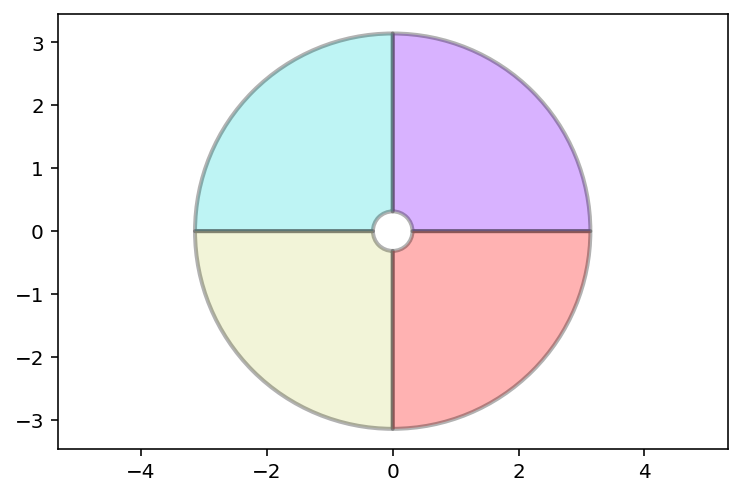

In [353]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()


patches = []

patches += [
    Wedge((0,0), np.pi, 0, 90,width=0.90*np.pi),
    Wedge((0,0), np.pi, 90, 180, width=0.90*np.pi),  
    Wedge((0,0), np.pi, 180, 270,width=0.90*np.pi), 
    Wedge((0,0), np.pi, 270,360, width=0.90*np.pi),  
]


colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap='rainbow', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)




plt.axis('equal')
# plt.axis('off')
# plt.tight_layout()

plt.show()

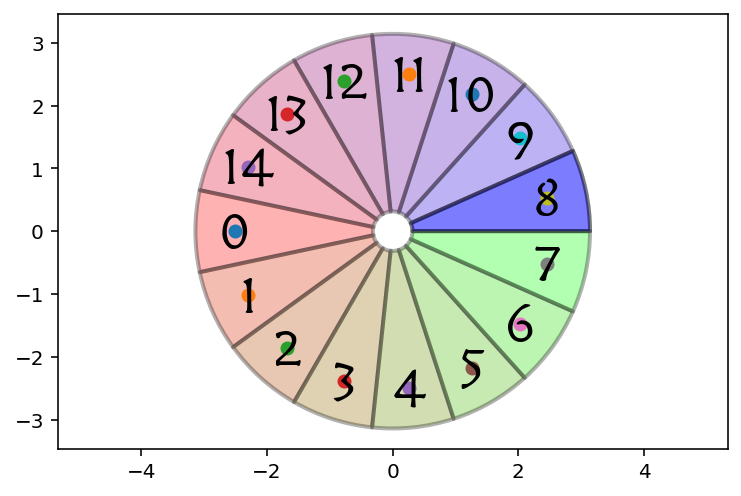

In [478]:
fig, ax = plt.subplots()

patches=[]
ws=[]
we=[]
n = 15
radius = np.pi
for i in np.arange(0,n+1):
    ws.append(360/n*i),
    we.append(360/n*(i+1))
for x in zip(ws,we):
    wedge = Wedge((0,0), radius, x[0], x[1],width=0.90*np.pi)
    patches.append(wedge)




colors = np.linspace(0, 1, len(patches[:-1]))
collection = PatchCollection(patches, cmap='brg', alpha=0.3, lw=2, ec='k')
collection.set_array(colors)
ax.add_collection(collection)


a = 1*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
# thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = n+1 # Number of Saros periods (+1 for end marker)
# 
if n//2==0: 
    thetaMin, thetaMax = (0+(2*np.pi/n/2)), (2*np.pi+(2*np.pi/n/2))
if n//2 !=0:
    thetaMin, thetaMax = 0, 2*np.pi
#     thetaMin, thetaMax = ((0.5*np.pi)+((2*np.pi)/(.5*steps))), ((2.5*np.pi)+((2*np.pi)/(.5*steps)))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = -a*0.8

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
labels=[]
for i in range(n):
    labels.append(str(i))
for label, x, y, angle in zip(labels, xOuter, yOuter, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'bold'})
        plt.scatter(x,y)



plt.axis('equal')
# plt.axis('off')
# plt.tight_layout()

plt.show()


In [441]:
start_index=3
for index in range(len(labels)): print(labels[(index + start_index) % len(labels)])
#     https://stackoverflow.com/questions/32997395/iterate-through-a-list-given-a-starting-point

3
4
5
6
7
8
9
0
1
2


In [467]:
# np.rad2deg((0.5*np.pi)+((2*np.pi)/(.5*steps)))
np.rad2deg(2*np.pi/n/2)

36.0

In [468]:
n

10

In [489]:
17.7/4.1

4.317073170731708

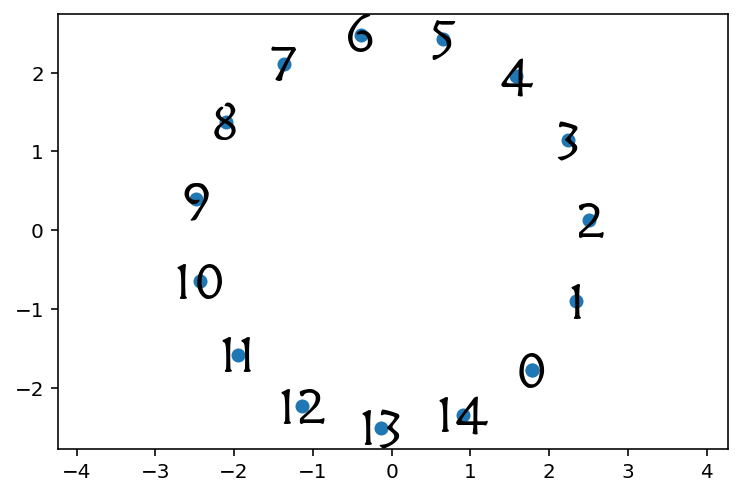

In [429]:

a = 1*np.pi # determines the width of the turns - set to 1 means width is 2 Pi
b = .5*np.pi
thetaMin, thetaMax = 0, 2*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 15+1 # Number of Saros periods (+1 for end marker)
thetaMin, thetaMax = (0.5*np.pi+(2*np.pi)/(.5*steps)), (2.5*np.pi+(2*np.pi)/(.5*steps))

# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

rOuter = -a*0.8

xOuter = rOuter*np.cos(theta)
yOuter = rOuter*np.sin(theta)
    
labels=[]
for i in range(n):
    labels.append(str(i))
for label, x, y, angle in zip(labels, xOuter, yOuter, np.rad2deg(theta)):
        if y < 0: angle = -angle+90 
        if y > 0: angle = -angle-90
        plt.text(x,y, label , rotation = 0, ha="center", va="center",
                fontdict={'fontname': 'Herculanum',
                         'fontsize': '30',
        'fontweight' : 'bold'})
plt.axis('equal')    
plt.show();

In [409]:
labels=[]
for i in range(n):
    labels.append(str(i))
    

In [438]:
labels

['0', '1', '2', '3']

AttributeError: module 'matplotlib.pyplot' has no attribute 'mpatches'

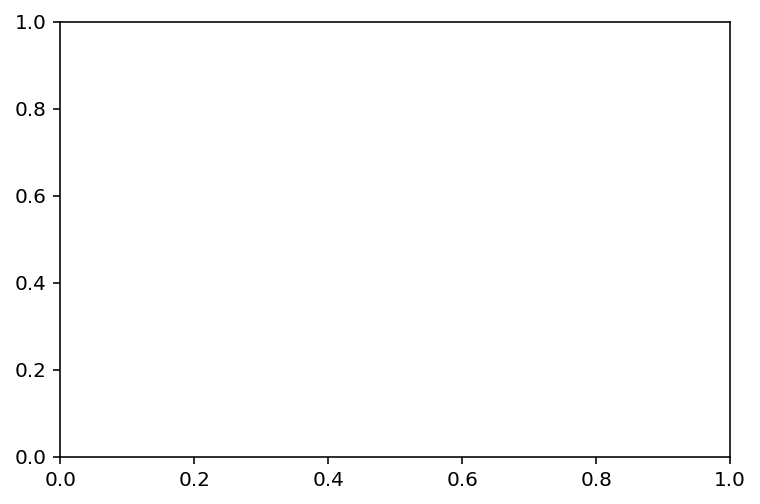

In [299]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection



fig, ax = plt.subplots()





# add a wedge
plt.mpatches.Wedge(0.1, 0.1, 10, 20 , ec="none")
# patches.append(wedge)
# label(2, "Wedge")
plt.mpatches.Wedge(0.1, 0.1, 20,40, ec="none")
# patches.append(wedge)




colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(colors)
ax.add_collection(collection)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

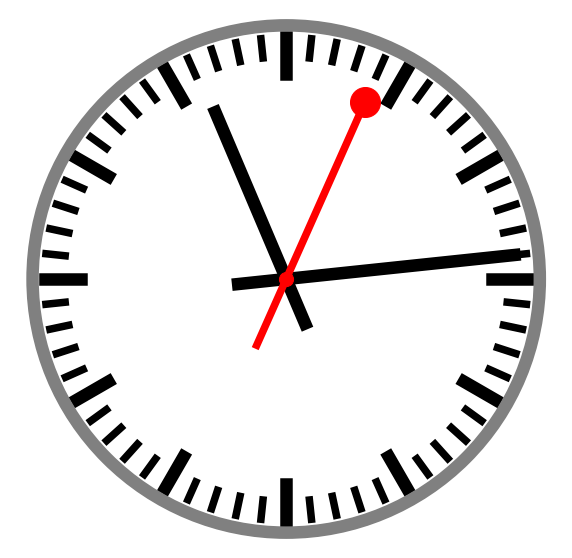

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = (10,10)
fig, ax = plt.subplots(figsize=figsize)


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='grey', lw=(figsize[0]/4)*5, zorder=90))

#create clock face

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    xfhms, yfhms = rotate(origin, facehourmarkstart, math.radians(angle))
    xfme, yfme = rotate(origin, facemarkend, math.radians(angle))
    ax.plot((yfhms, yfme),(xfhms, xfme), lw = (figsize[0]/4)*5, c='black')
 
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    xfmms, yfmms = rotate(origin, faceminutemarkstart, math.radians(angle))
    xfme, yfme = rotate(origin, facemarkend, math.radians(angle))
    ax.plot((yfmms, yfme),(xfmms, xfme), lw =(figsize[0]/4)*3, c='black')
    

#plot clock hands (opposites to go beyond the centre)
ax.plot((ym, 0),(xm, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yh, 0),(xh,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yho, 0),(xho,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ys, 0),(xs,0), lw =(figsize[0]/4)*3, marker='o',c='red', markevery=-1, markersize=(figsize[0]/4)*12)
ax.plot((yso, 0),(xso,0), lw =(figsize[0]/4)*3,c='red')
ax.scatter(0,0, c= 'red', s=(figsize[0]/4)*80, zorder=100)


#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show();

## Earlier versions

One using a scattered marker for the clock faceplate. This does not scale when changing the figsize.

In [497]:
#create the data to plot the clock dial
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)

df['hr']=hr
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))


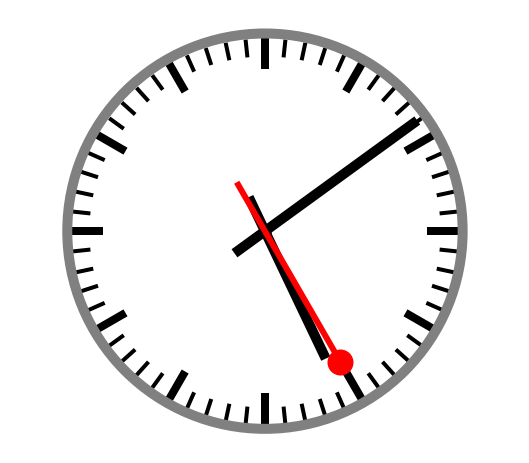

In [525]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = (4,4)
fig, ax = plt.subplots(figsize=figsize)


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='grey', lw=5, zorder=90))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=(figsize[0]/4)*300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=(figsize[0]/4)*80, c='k', lw=2)

    

ax.plot((ym, 0),(xm, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =(figsize[0]/4)*5, c='black')
# ax.plot((0, 0),(0.8, 0), lw =5, c='black')
ax.plot((yh, 0),(xh,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yho, 0),(xho,0), lw =(figsize[0]/4)*5, c='black')
ax.scatter(0,0, c= 'red')


ax.plot((ys, 0),(xs,0), lw =(figsize[0]/4)*3, marker='o',c='red', markevery=-1, markersize=(figsize[0]/4)*12)
ax.plot((yso, 0),(xso,0), lw =(figsize[0]/4)*3,c='red')

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()

## Trials to use rectangles for clock face plate

For now not able to get them in the right position

In [467]:
i=3
angle = (np.array(np.linspace(15,360,24))[i])
a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
i_=10
angle = (np.array(np.linspace(15,360,24))[i_])
a3, a4  = (df['hr_sin'][i_],df['hr_cos'][i_])

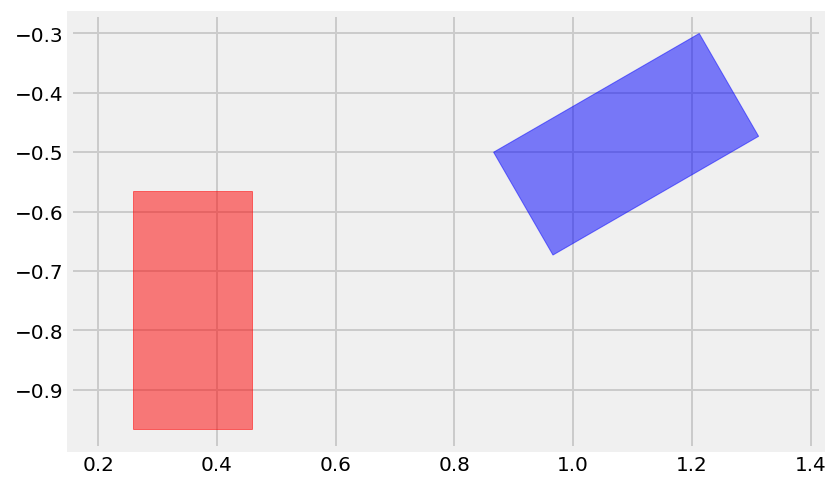

In [468]:
# https://stackoverflow.com/questions/4285103/matplotlib-rotating-a-patch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

r3 = patches.Rectangle((a1,a2), .2, .4, color="blue", alpha=0.50)
r2 = patches.Rectangle((a3,a4), .2, .4, color="red",  alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-0) + ax.transData
t3 = mpl.transforms.Affine2D().rotate_deg(-60) + ax.transData
r2.set_transform(t2)
r3.set_transform(t3)

ax.add_patch(r3)
ax.add_patch(r2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid(True)
ax.axis('equal')
plt.show()

In [422]:
df['angle']= list(np.linspace(15,360,24))

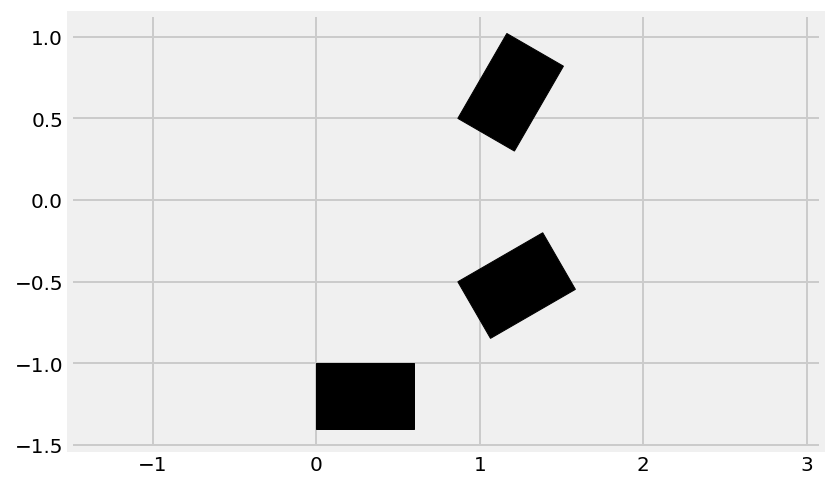

In [448]:
## import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

# r1 = patches.Rectangle((df['hr_sin'][0],df['hr_cos'][0]), .2, .4, color="blue", alpha=0.50)
# r2 = patches.Rectangle((df['hr_sin'][1],df['hr_cos'][1]), .2, .4, color="red",  alpha=0.50)

# t1 = mpl.transforms.Affine2D().rotate_deg(-df['angle'][0]) + ax.transData
# t2 = mpl.transforms.Affine2D().rotate_deg(-df['angle'][1]) + ax.transData
# r1.set_transform(t1)
# r2.set_transform(t2)

# ax.add_patch(r1)
# ax.add_patch(r2)

for i in range(1,6,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    w = .40
    l = .60    
    r1 = patches.Rectangle((df['hr_sin'][i],df['hr_cos'][i]), w, l, color='k')
    t1 = mpl.transforms.Affine2D().rotate_deg(-angle) + ax.transData
#     t1 = mpl.transforms.Affine2D().rotate_deg(-df['angle'][i]) + ax.transData
    
    r1.set_transform(t1)
    
    ax.add_patch(r1)
    


plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid(True)
ax.axis('equal')
plt.show()

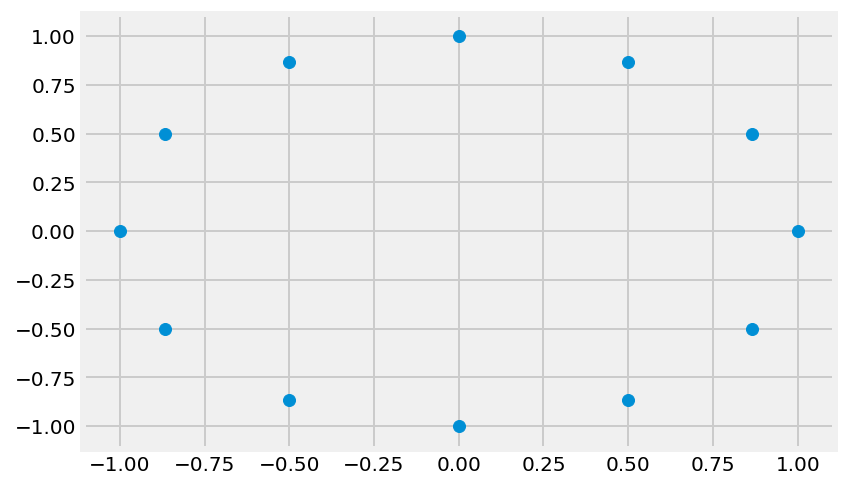

In [454]:
plt.scatter(df['hr_sin'][1::2],df['hr_cos'][1::2])

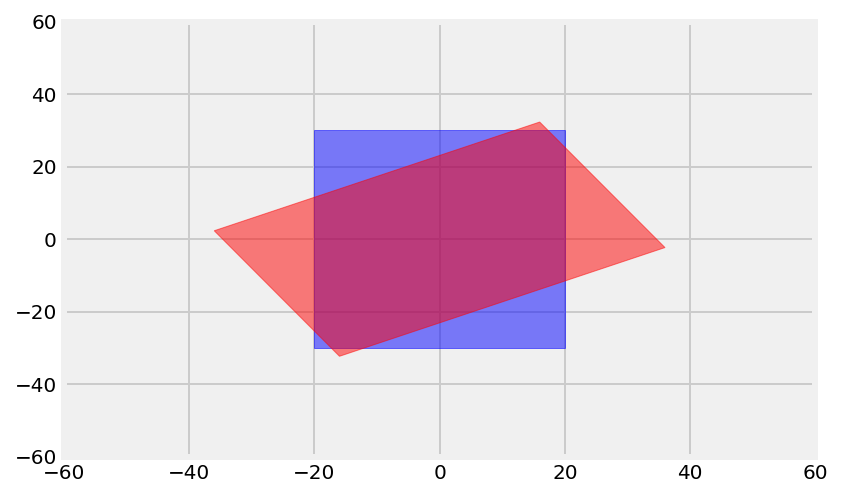

In [442]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

w = 40
l = 60
r1 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="blue", alpha=0.50)

r2 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="red", alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-60) + ax.transData
r2.set_transform(t2)

ax.add_patch(r1)
ax.add_patch(r2)

plt.xlim(-60, 60)
plt.ylim(-60, 60)

plt.grid(True)

plt.show()

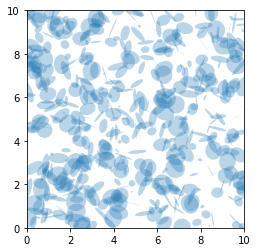

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
%matplotlib inline

NUM = 500

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(.30)
#     e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

In [537]:
sl =[]
for x in range(223):
    sl.append('')

sl[0]='S18\nM20'
sl[6]='S12\nM15'
sl[12]='S21'
sl[19]='00'
sl[24]='S08'
sl[29]='M04'
sl[30]='S04'
sl[35]='M01'
sl[36]='S23'
sl[41]='S14\nM21'
sl[47]='S03\nM03'
sl[53]='S21'
sl[59]='S11\nM12'

In [538]:
for i in enumerate(sl):
    print(i)

(0, 'S18\nM20')
(1, '')
(2, '')
(3, '')
(4, '')
(5, '')
(6, 'S12\nM15')
(7, '')
(8, '')
(9, '')
(10, '')
(11, '')
(12, 'S21')
(13, '')
(14, '')
(15, '')
(16, '')
(17, '')
(18, '')
(19, '00')
(20, '')
(21, '')
(22, '')
(23, '')
(24, 'S08')
(25, '')
(26, '')
(27, '')
(28, '')
(29, 'M04')
(30, 'S04')
(31, '')
(32, '')
(33, '')
(34, '')
(35, 'M01')
(36, 'S23')
(37, '')
(38, '')
(39, '')
(40, '')
(41, 'S14\nM21')
(42, '')
(43, '')
(44, '')
(45, '')
(46, '')
(47, 'S03\nM03')
(48, '')
(49, '')
(50, '')
(51, '')
(52, '')
(53, 'S21')
(54, '')
(55, '')
(56, '')
(57, '')
(58, '')
(59, 'S11\nM12')
(60, '')
(61, '')
(62, '')
(63, '')
(64, '')
(65, '')
(66, '')
(67, '')
(68, '')
(69, '')
(70, '')
(71, '')
(72, '')
(73, '')
(74, '')
(75, '')
(76, '')
(77, '')
(78, '')
(79, '')
(80, '')
(81, '')
(82, '')
(83, '')
(84, '')
(85, '')
(86, '')
(87, '')
(88, '')
(89, '')
(90, '')
(91, '')
(92, '')
(93, '')
(94, '')
(95, '')
(96, '')
(97, '')
(98, '')
(99, '')
(100, '')
(101, '')
(102, '')
(103, '')
(104, '

(180, 360, 4)


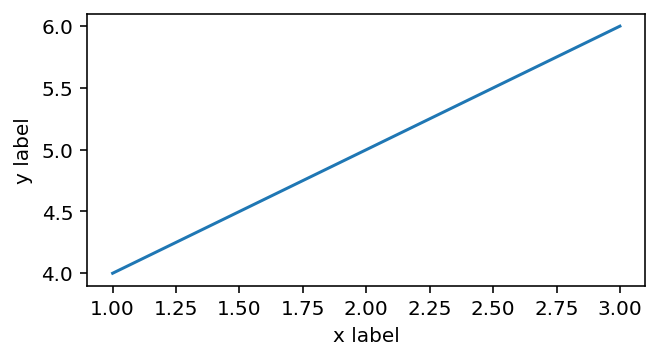

In [502]:
plt.figure(figsize=(5, 2.5))
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel("x label")
plt.ylabel("y label")
plt.savefig("direct.png")
print(imread("direct.png").shape) # outputs (250, 500, 4)

(181, 330, 4)


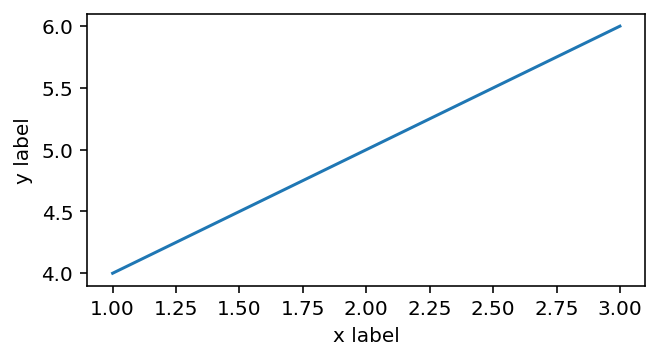

In [503]:
plt.figure(figsize=(5, 2.5))
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel("x label")
plt.ylabel("y label")
plt.savefig("tight-layout.png", bbox_inches='tight')
print(imread("tight-layout.png").shape) # outputs (259, 462, 4)

(180, 359, 4)


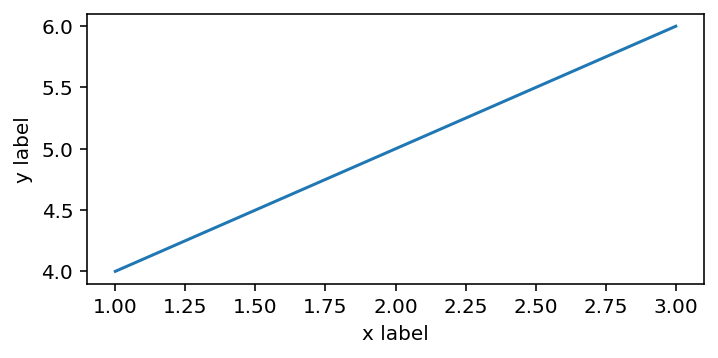

In [504]:
fig = plt.figure()
fig.gca().plot([1, 2, 3], [4, 5, 6])
plt.gca().set_xlabel("x label")
plt.gca().set_ylabel("y label")
set_size(fig, (5, 2.5))
plt.savefig("update-size.png", bbox_inches='tight')
print(imread("update-size.png").shape) # outputs (250, 500, 4)